In [0]:
# Path for Karen
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/NN Project

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/NN Project


In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import Dense, LSTM, Dropout, Activation, Input
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Model, load_model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

Using TensorFlow backend.


In [0]:
#read market
apple_df = pd.read_csv('data/apple_data.csv')
apple_df.head()

,Unnamed: 0,time,open,close,close_open_diff,volume,urgency,relevance,sentimentClass,sentimentNegative,sentimentNeutral,sentimentPositive,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts3D,volumeCounts5D,volumeCounts7D,returnsOpenPrevMktres1,returnsOpenPrevRaw1,returnsClosePrevRaw1,returnsOpenPrevRaw10,returnsOpenPrevMktres10,returnsOpenNextMktres10
0,2,2007-02-01,86.230,84.74,0.982721,23747329.0,3.000000,0.764940,0.000000,0.502267,0.155558,0.342176,0.250000,0.250000,0.250000,30.500000,32.250000,43.750000,0.000000,0.016324,-0.011548,-0.037182,0.0,-0.007425
1,878,2007-02-02,84.120,84.75,1.007489,22212416.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.026983,-0.024469,0.000118,-0.050779,0.0,-0.009770
2,1752,2007-02-05,84.300,83.94,0.995730,20737742.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001477,0.002140,-0.009558,-0.054297,0.0,0.005037
3,2624,2007-02-06,84.450,84.15,0.996448,30893975.0,2.333333,0.894933,0.333333,0.236076,0.288736,0.475188,1.333333,1.444444,1.444444,8.666667,26.777778,51.222222,0.002135,0.001779,0.002502,-0.014931,0.0,0.057268
4,3494,2007-02-07,84.495,86.15,1.019587,38180972.0,3.000000,0.392098,0.230769,0.301042,0.255153,0.443805,0.461538,0.461538,0.538462,19.461538,39.000000,51.769231,0.000392,0.000533,0.023767,-0.025039,0.0,0.034650


In [0]:
apple_x = apple_df[['close_open_diff', 'urgency', 'relevance','sentimentClass', 'sentimentNegative', 'sentimentNeutral', 'sentimentPositive','noveltyCount3D', 'noveltyCount5D', 'noveltyCount7D', 'volumeCounts3D', 'volumeCounts5D', 'volumeCounts7D', 'returnsOpenPrevMktres1', 'returnsClosePrevRaw1', 'returnsOpenPrevRaw10', 'returnsOpenPrevMktres10']]
apple_x = np.array(apple_x)

apple_y = apple_df['returnsOpenNextMktres10']
apple_y = np.array(apple_y)

test_num_rows = 250
train_num_rows = len(apple_df) - 250

X_train = apple_x[:train_num_rows]
X_test = apple_x[-test_num_rows:]
y_train = apple_y[:train_num_rows]
y_test = apple_y[-test_num_rows:]



In [0]:
#scale the feature values for training dataset
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X_train, y_train)  
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                      oob_score=False, random_state=0, verbose=0, warm_start=False)
print(regr.feature_importances_)


[0.04275977 0.00320547 0.00784053 0.00724894 0.01286798 0.00347321
 0.         0.01707858 0.02371989 0.02386248 0.03556416 0.04465669
 0.03185346 0.00573188 0.01274688 0.26155498 0.46583508]


In [0]:
pred = regr.predict(X_test)

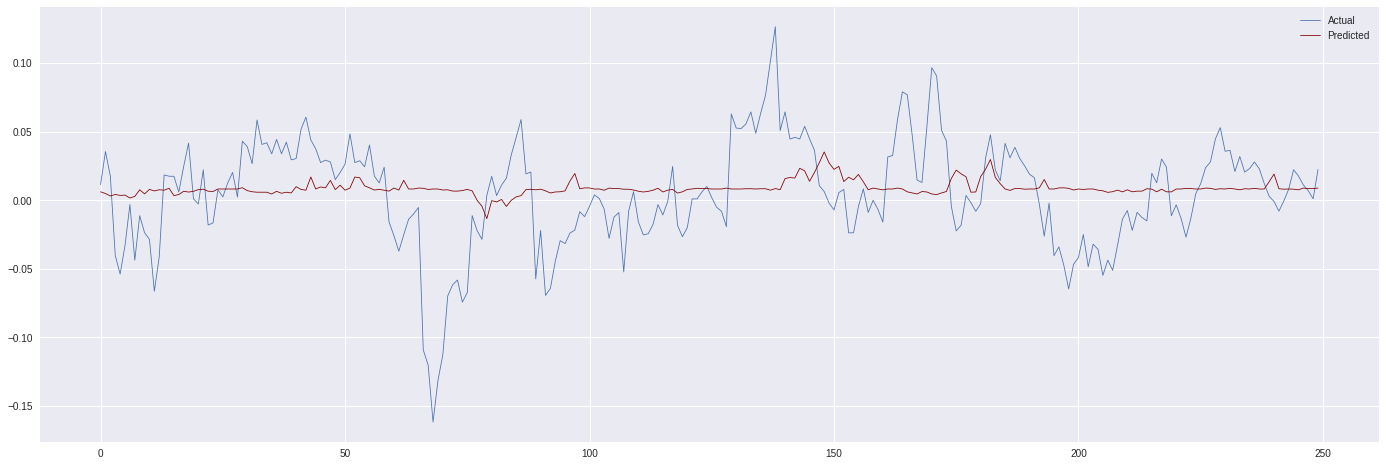

In [0]:
#plot them
plt.figure(figsize=(24,8))

#get length of the results
cycles = np.arange(len(y_test))

#plot cycles agaonts real
plt.plot(cycles, y_test, label="Actual", lw=0.8)

#plot cycles against predictions made
plt.plot(cycles, pred, 'maroon', label="Predicted", lw=0.8)

plt.legend()
plt.show()

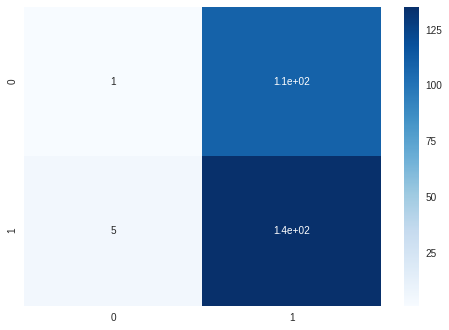

In [0]:
pred_binary = np.where(pred>0, 1, 0)
y_binary = np.where(y_test>0, 1, 0)

cm = confusion_matrix(y_binary, pred_binary)
sns.heatmap(cm, annot=True, cmap='Blues')

In [0]:
print(classification_report(y_binary, pred_binary))

print ('Accuracy: %s' % (accuracy_score(y_binary, pred_binary)*100))

              precision    recall  f1-score   support

           0       0.17      0.01      0.02       110
           1       0.55      0.96      0.70       140

    accuracy                           0.54       250
   macro avg       0.36      0.49      0.36       250
weighted avg       0.38      0.54      0.40       250

Accuracy: 54.400000000000006
